### TimeSeries Analysis of Sales

Time series analysis and modeling have many business and social applications. It is extensively used to forecast company sales, product demand, stock market trends, agricultural production etc.

The fundamental idea for time series analysis is to decompose the original time series (sales, stock market trends, etc.) into several independent components. Typically, business time series are divided into the following four components:

- Trend – overall direction of the series i.e. upwards, downwards etc.
- Seasonality – monthly or quarterly patterns
- Cycle – long-term business cycles, they usually come after 5 or 7 years
- Irregular remainder – random noise left after extraction of all the components

Interference of these components produces the final series.

### Problem Definition

Develop a model to forecast sale / demand of tractor for next 3 years. Additionally, We will also investigate the impact of marketing program on sales 


### Univariate Time Series

In [29]:
import warnings
import itertools

import pandas as pd
import numpy as np

#import statsmodels.api as sm
import statsmodels.tsa.api as smt
#import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline

#### Step 1: Visualize Sales data as time series

In [30]:
sales_data = pd.read_csv("Tractor-Sales.csv")
sales_data.head(5)

,Month-Year,Number of Tractor Sold
0,Jan-03,141
1,Feb-03,157
2,Mar-03,185
3,Apr-03,199
4,May-03,203


In [31]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month-Year                144 non-null object
Number of Tractor Sold    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.3+ KB


In [32]:
# since the complete date was not mentioned, we assume that it was the first of every month
dates = pd.date_range(start='2003-01-01', freq='MS', periods=len(sales_data))

In [33]:
dates

DatetimeIndex(['2003-01-01', '2003-02-01', '2003-03-01', '2003-04-01',
               '2003-05-01', '2003-06-01', '2003-07-01', '2003-08-01',
               '2003-09-01', '2003-10-01',
               ...
               '2014-03-01', '2014-04-01', '2014-05-01', '2014-06-01',
               '2014-07-01', '2014-08-01', '2014-09-01', '2014-10-01',
               '2014-11-01', '2014-12-01'],
              dtype='datetime64[ns]', length=144, freq='MS')

In [34]:
import calendar
sales_data['Month'] = dates.month
sales_data['Month'] = sales_data['Month'].apply(lambda x: calendar.month_abbr[x])
sales_data['Year'] = dates.year

In [35]:
sales_data.head()

,Month-Year,Number of Tractor Sold,Month,Year
0,Jan-03,141,Jan,2003
1,Feb-03,157,Feb,2003
2,Mar-03,185,Mar,2003
3,Apr-03,199,Apr,2003
4,May-03,203,May,2003


In [36]:
sales_data.drop(['Month-Year'], axis=1, inplace=True)
sales_data.rename(columns={'Number of Tractor Sold':'Tractor-Sales'}, inplace=True)
sales_data = sales_data[['Month', 'Year', 'Tractor-Sales']]

In [37]:
sales_data.head()

,Month,Year,Tractor-Sales
0,Jan,2003,141
1,Feb,2003,157
2,Mar,2003,185
3,Apr,2003,199
4,May,2003,203


In [38]:
# set the dates as the index of the dataframe, so that it can be treated as a time-series dataframe
sales_data.set_index(dates, inplace=True)

In [39]:
# check out first 5 samples of the data
sales_data.head(5)

,Month,Year,Tractor-Sales
2003-01-01,Jan,2003,141
2003-02-01,Feb,2003,157
2003-03-01,Mar,2003,185
2003-04-01,Apr,2003,199
2003-05-01,May,2003,203


In [40]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 2003-01-01 to 2014-12-01
Freq: MS
Data columns (total 3 columns):
Month            144 non-null object
Year             144 non-null int64
Tractor-Sales    144 non-null int64
dtypes: int64(2), object(1)
memory usage: 4.5+ KB


In [41]:
# extract out the time-series
sales_ts = sales_data['Tractor-Sales']

In [42]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

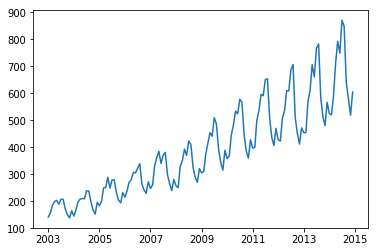

In [43]:
plt.plot(sales_ts)

Text(0,0.5,'Tractor Sales')

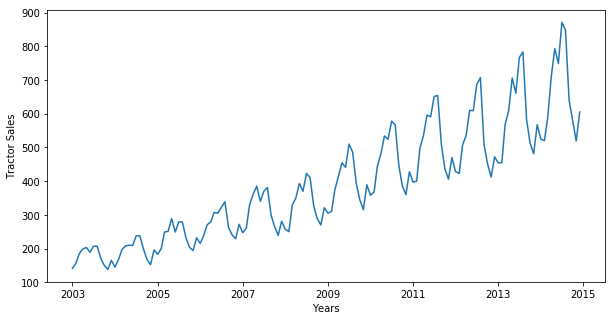

In [44]:
plt.figure(figsize=(10, 5))
plt.plot(sales_ts)
plt.xlabel('Years')
plt.ylabel('Tractor Sales')

In [45]:
sales_ts.rolling(window=4).mean()

2003-01-01       NaN
2003-02-01       NaN
2003-03-01       NaN
2003-04-01    170.50
2003-05-01    186.00
2003-06-01    194.00
2003-07-01    199.50
2003-08-01    201.50
2003-09-01    193.50
2003-10-01    183.75
2003-11-01    166.50
2003-12-01    156.00
2004-01-01    149.50
2004-02-01    154.00
2004-03-01    168.75
2004-04-01    179.50
2004-05-01    195.75
2004-06-01    206.00
2004-07-01    216.25
2004-08-01    223.75
2004-09-01    221.00
2004-10-01    210.75
2004-11-01    189.25
2004-12-01    178.75
2005-01-01    174.75
2005-02-01    182.75
2005-03-01    207.00
2005-04-01    220.75
2005-05-01    247.25
2005-06-01    259.50
               ...  
2012-07-01    610.50
2012-08-01    653.25
2012-09-01    628.00
2012-10-01    588.75
2012-11-01    520.00
2012-12-01    461.25
2013-01-01    447.50
2013-02-01    448.25
2013-03-01    487.25
2013-04-01    521.75
2013-05-01    584.75
2013-06-01    636.25
2013-07-01    686.00
2013-08-01    729.25
2013-09-01    698.50
2013-10-01    661.50
2013-11-01   

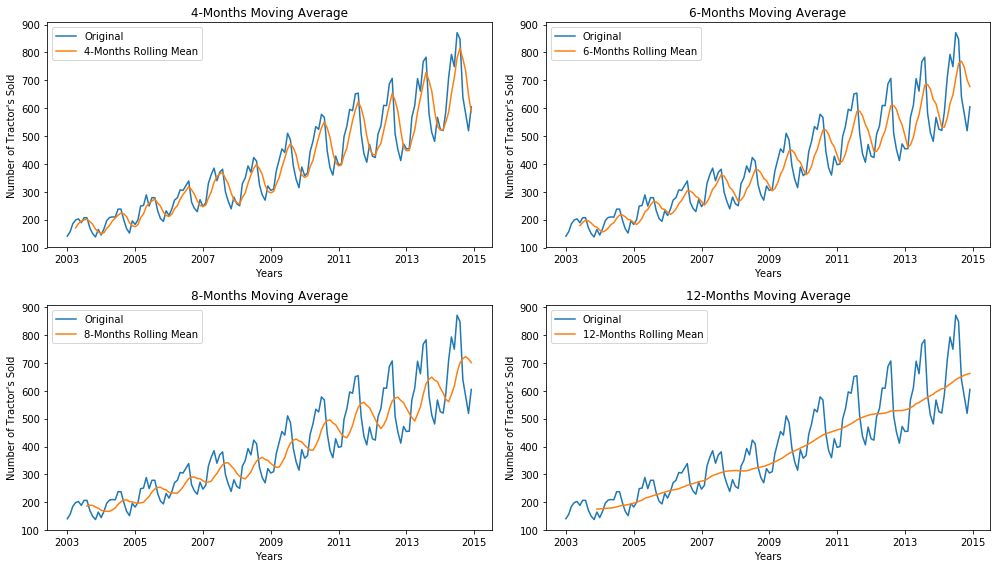

In [46]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)

axes[0][0].plot(sales_ts.index, sales_ts, label='Original')
axes[0][0].plot(sales_ts.index, sales_ts.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Number of Tractor's Sold")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')

axes[0][1].plot(sales_ts.index, sales_ts, label='Original')
axes[0][1].plot(sales_ts.index, sales_ts.rolling(window=6).mean(), label='6-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Number of Tractor's Sold")
axes[0][1].set_title("6-Months Moving Average")
axes[0][1].legend(loc='best')

axes[1][0].plot(sales_ts.index, sales_ts, label='Original')
axes[1][0].plot(sales_ts.index, sales_ts.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Number of Tractor's Sold")
axes[1][0].set_title("8-Months Moving Average")
axes[1][0].legend(loc='best')

axes[1][1].plot(sales_ts.index, sales_ts, label='Original')
axes[1][1].plot(sales_ts.index, sales_ts.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Number of Tractor's Sold")
axes[1][1].set_title("12-Months Moving Average")
axes[1][1].legend(loc='best')

plt.tight_layout()
plt.show()

As we could see in the above plots, 12-month moving average could produce a wrinkle free curve as desired. This on some level is expected since we are using month-wise data for our analysis and there is expected monthly-seasonal effect in our data.

Let's plot the rolling mean and standard deviation on window of 12 months.

#### Step 1.2: Seasonality – Time Series Decomposition

We will plot a stacked annual plot to observe seasonality in our data.

In [47]:
monthly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Year", index = "Month")
monthly_sales_data = monthly_sales_data.reindex(index = ['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
monthly_sales_data

Year,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
Month,,,,,,,,,,,,
Jan,141,145,183,215,247,257,305,358,397,428,454,525
Feb,157,168,200,239,261,250,310,368,400,423,455,520
Mar,185,197,249,270,330,329,374,444,498,507,568,587
Apr,199,208,251,279,362,350,414,482,536,536,610,710
May,203,210,289,307,385,393,454,534,596,610,706,793
Jun,189,209,249,305,340,370,441,524,591,609,661,749
Jul,207,238,279,322,370,423,510,578,651,687,767,871
Aug,207,238,279,339,381,410,486,567,654,707,783,848
Sep,171,199,232,263,299,326,393,447,509,509,583,640


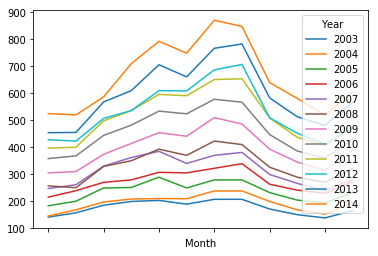

In [48]:
monthly_sales_data.plot()

In [49]:
yearly_sales_data = pd.pivot_table(sales_data, values = "Tractor-Sales", columns = "Month", index = "Year")
yearly_sales_data = yearly_sales_data[['Jan','Feb','Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']]
yearly_sales_data

Month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2003,141,157,185,199,203,189,207,207,171,150,138,165
2004,145,168,197,208,210,209,238,238,199,168,152,196
2005,183,200,249,251,289,249,279,279,232,204,194,232
2006,215,239,270,279,307,305,322,339,263,241,229,272
2007,247,261,330,362,385,340,370,381,299,266,239,281
2008,257,250,329,350,393,370,423,410,326,289,270,321
2009,305,310,374,414,454,441,510,486,393,345,315,389
2010,358,368,444,482,534,524,578,567,447,386,360,428
2011,397,400,498,536,596,591,651,654,509,437,406,470


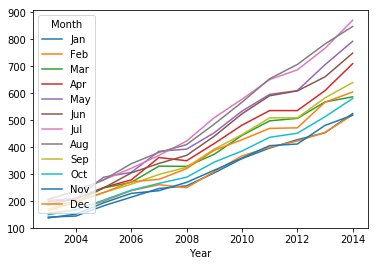

In [50]:
yearly_sales_data.plot()

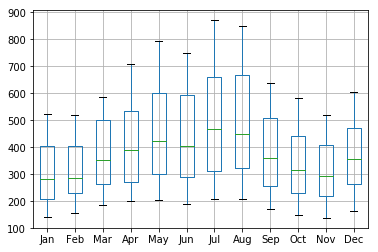

In [51]:
yearly_sales_data.boxplot()

#### Important Inferences

The tractor sales have been increasing without fail every year.

July and August are the peak months for tractor sales and the variance and the mean value in July and August are also much higher than any of the other months.

We can see a seasonal cycle of 12 months where the mean value of each month starts with a increasing trend in the beginning of the year and drops down towards the end of the year. We can see a seasonal effect with a cycle of 12 months.


#### Step 1.3: Irregular Remainder – Time Series Decomposition
To decipher underlying patterns in tractor sales, we build a multiplicative time series decomposition model with the following equation:

- Yt=Trendt×Seasonalityt×Remaindert
 
Instead of multiplicative model we could have chosen additive model as well. In that case the equaltion would have been:

- Yt=Trendt+Seasonalityt+Remaindert
 

In [56]:
import statsmodels as sm

In [57]:
decomposition = sm.tsa.seasonal.seasonal_decompose(sales_ts, model='multiplicative',two_sided=False, extrapolate_trend=4)

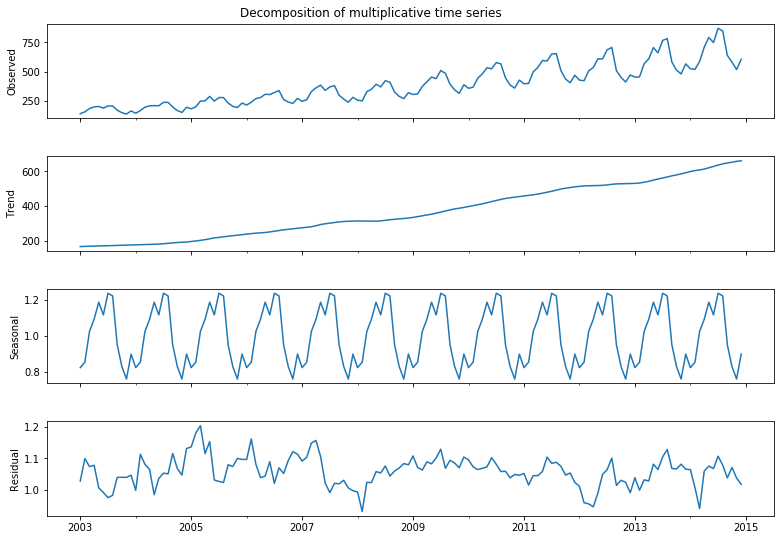

In [58]:
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

In [59]:
decomp_output = pd.DataFrame(pd.concat([decomposition.observed, decomposition.trend, decomposition.seasonal, decomposition.resid], axis=1))

In [60]:
decomp_output.columns = ['observed', 'Trend', 'Seasonal', 'Irregular']

In [61]:
decomp_output['TSI'] = decomp_output.Trend*decomp_output.Seasonal*decomp_output.Irregular

In [62]:
decomp_output

,observed,Trend,Seasonal,Irregular,TSI
2003-01-01,141,166.408333,0.823508,1.028907,141.0
2003-02-01,157,167.216667,0.853891,1.099557,157.0
2003-03-01,185,168.025000,1.024830,1.074350,185.0
2003-04-01,199,168.833333,1.092962,1.078424,199.0
2003-05-01,203,169.641667,1.187805,1.007438,203.0
2003-06-01,189,170.450000,1.116933,0.992745,189.0
2003-07-01,207,171.258333,1.237474,0.976748,207.0
2003-08-01,207,172.066667,1.222687,0.983917,207.0
2003-09-01,171,172.875000,0.950868,1.040265,171.0
2003-10-01,150,173.683333,0.829943,1.040603,150.0


### Forecasting using decomposition with the help of STLDECOMPOSE PACKAGE

In [63]:
#pip install stldecompose
#import stldecompose as stl
# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift, 
                                         mean, 
                                         seasonal_naive)

#### Decomposition

In [37]:
decompose?

One of the primary pieces of functionality is the STL decomposition. The associated method requires the observation frame, and the primary (largest) period of seasonality. This period is specified in terms of index positions, and so care is needed for the user to correctly specify the periodicity in terms of their observations.

For example, with daily observations and large annual cycles, period=365. For hourly observations with large daily cycles, period=24. Some inspection, and trial and error may be helpful.

In [64]:
decomp = decompose(sales_ts, period=12)

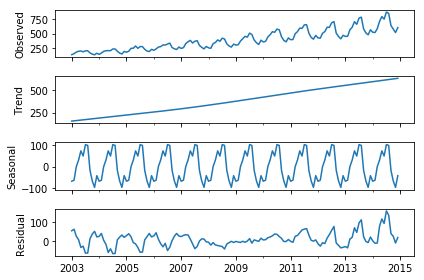

In [65]:
decomp.plot();

#### Forecast
While the STL decomposition is interesting on its own, STLDecompose also provides some relatively naive capabilities for using the decomposition to forecast based on our observations.

We'll use the same data set, but pretend that we only had the first two third of observations. Then we can compare our forecast to the real observation data.

The forecast() method requires the following arguments:

the previously fit DecomposeResult
the number of steps forward for which we'd like the forecast
the specific forecasting function to be applied to the decomposition
There are a handful of predefined functions that can be imported from the stldecompose.forecast_funcs module.

In [66]:
fcast = forecast(decomp, steps=36, fc_func=drift, seasonal=True)

fcast

,drift+seasonal
2014-12-31,565.979215
2015-01-30,574.072482
2015-03-01,639.745165
2015-03-31,673.076709
2015-04-30,718.397706
2015-05-30,698.206521
2015-06-29,753.763785
2015-07-29,753.474031
2015-08-28,642.845684
2015-09-27,597.966254


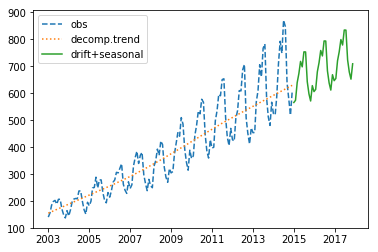

In [67]:
plt.plot(sales_ts, '--', label='obs')
plt.plot(decomp.trend, ':', label='decomp.trend')
plt.plot(fcast, '-', label=fcast.columns[0])

plt.legend();

### ETS Models (Exponential Smoothening Models)

### Single Exponential Smoothing
Single Exponential Smoothing or simple smoothing can be implemented in Python via the SimpleExpSmoothing Statsmodels class.


In [68]:
### single exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# our guessed parameters
alpha = 0.4
beta = 0.2
gamma = 0.01

# initialise model
ets_model = ExponentialSmoothing(sales_ts, trend='mul', seasonal='mul', seasonal_periods=12)
ets_fit = ets_model.fit(smoothing_level=alpha, smoothing_slope=beta, smoothing_seasonal=gamma)

In [69]:
# forecast p months ahead
p_ahead = 36
yh = ets_fit.forecast(p_ahead)

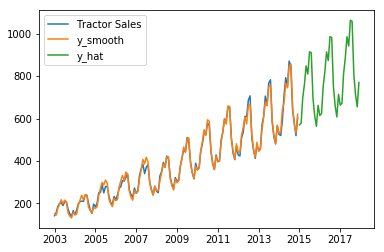

In [70]:
# plot the y, y_smoothed and y_hat ts'
plt.plot(sales_ts, label='Tractor Sales')
plt.plot(ets_fit.fittedvalues, label='y_smooth')
plt.plot(yh, label='y_hat')

plt.legend()
plt.show()

### Dickey-Fuller Test 
- Let's run the Dicky Fuller Test on the timeseries and verify the null hypothesis that the TS is non-stationary.

In [71]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller

In [72]:
adfuller(sales_ts)

(1.108825059146732,
 0.9952912415248419,
 14,
 129,
 {'1%': -3.482087964046026,
  '5%': -2.8842185101614626,
  '10%': -2.578864381347275},
 1082.5357724796872)

In [73]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   1.108825
p-value                          0.995291
#lags Used                      14.000000
Number of Observations Used    129.000000
Critical Value (1%)             -3.482088
Critical Value (5%)             -2.884219
Critical Value (10%)            -2.578864
dtype: float64


Though the variation in standard deviation is small, rolling mean is clearly increasing with time and this is not a stationary series. Also, the test statistic is way more than the critical values.

As we observed while plotting the moving average over months that there is a monhly pattern, now, let’s decipher the seasonal component.

In [74]:
sales_ts_log = np.log10(sales_ts)

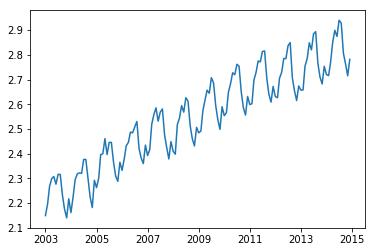

In [75]:
plt.plot(sales_ts_log)

In [76]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.732472
p-value                          0.414464
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


In [52]:
sales_ts.head()

2003-01-01    141
2003-02-01    157
2003-03-01    185
2003-04-01    199
2003-05-01    203
Freq: MS, Name: Tractor-Sales, dtype: int64

In [77]:
sales_ts.diff(1).head()

2003-01-01     NaN
2003-02-01    16.0
2003-03-01    28.0
2003-04-01    14.0
2003-05-01     4.0
Freq: MS, Name: Tractor-Sales, dtype: float64

In [78]:
sales_ts_diff1 = sales_ts.diff(1)
sales_ts_diff1.dropna(inplace=True)

In [79]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.543481
p-value                          0.105250
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [80]:
sales_ts_log_diff1 = sales_ts_log.diff(1)
sales_ts_log_diff1.dropna(inplace=True)

In [81]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_diff1)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -2.680467
p-value                          0.077480
#lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


In [82]:
sales_ts_log_diff2 = sales_ts_log.diff(2)
sales_ts_log_diff2.dropna(inplace=True)

In [84]:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(sales_ts_log_diff2)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.200722
p-value                          0.019943
#lags Used                      11.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


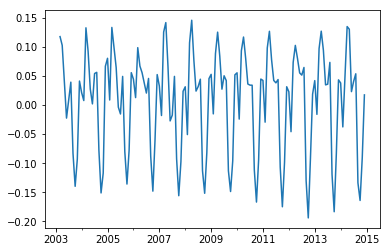

In [85]:
sales_ts_log_diff2.plot()

The following are some of our key observations from this analysis:
1) Trend: 12-months moving average looks quite similar to a straight line hence we could have easily used linear regression to estimate the trend in this data.
2) Seasonality: As discussed, seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend. Trend is removed from the time series using the following formula:

- Seasonalityt×Remaindert=YtTrendt

 
3) Irregular Remainder (random): is the residual left in the series after removal of trend and seasonal components. Remainder is calculated using the following formula:

- Remaindert=YtTrendt×Seasonalityt
 
The expectations from remainder component is that it should look like a white noise i.e. displays no pattern at all. However, for our series residual display some pattern with high variation on the edges of data i.e. near the beginning (2004-07) and the end (2013-14) of the series.

#### ARIMA Modeling
ARIMA is a combination of 3 parts i.e. AR (AutoRegressive), I (Integrated), and MA (Moving Average). A convenient notation for ARIMA model is ARIMA(p,d,q). Here p,d, and q are the levels for each of the AR, I, and MA parts. Each of these three parts is an effort to make the final residuals display a white noise pattern (or no pattern at all). 


####  Difference data to make data stationary on mean (remove trend)
Clearly the tractor sales has an upward trend for tractors sales and there is also a seasonal component that we have already analyzed.

The next thing to do is to make the series stationary by removing the upward trend through 1st order differencing of the series using the following formula:

1st Differencing (d=1) |  Y′t=Yt−Yt−1

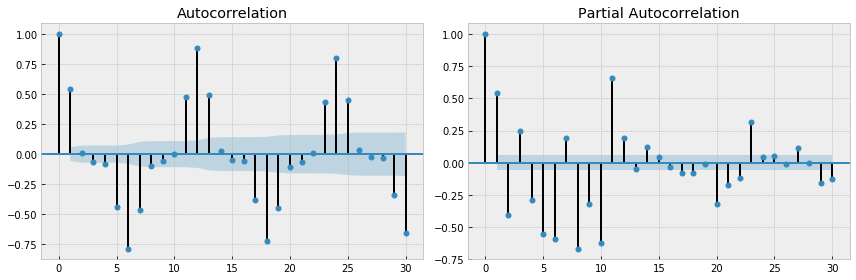

In [191]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(sales_ts_log_diff2, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(sales_ts_log_diff2, lags=30, ax=axes[1], alpha=0.5, method='ols')
plt.tight_layout()

####  Identification of best fit ARIMA model

In order to fit the time series data with a seasonal ARIMA model, we need to first find the the values of ARIMA(p,d,q)(P,D,Q)s that optimize a metric of interest such as AIC or BIC. 

In [62]:
sm.tsa.statespace.SARIMAX?

In [192]:
model = sm.tsa.statespace.SARIMAX(sales_ts_log, order = (1,2,1), seasonal_order= (1,0,0,12),
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)

In [193]:
results = model.fit()

In [194]:
print(results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 0, 12)   Log Likelihood                 329.109
Date:                            Sat, 08 Jun 2019   AIC                           -650.219
Time:                                    15:09:15   BIC                           -638.780
Sample:                                01-01-2003   HQIC                          -645.571
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3410      0.066     -5.151      0.000      -0.471      -0.211
ma.L1         -1.0000     25.914   

In [197]:
np.power(10, results.forecast(steps=36))

2015-01-01     562.972270
2015-02-01     557.568540
2015-03-01     627.453012
2015-04-01     754.697654
2015-05-01     840.389473
2015-06-01     795.456683
2015-07-01     921.069212
2015-08-01     897.829447
2015-09-01     683.790690
2015-10-01     622.849866
2015-11-01     558.541408
2015-12-01     648.259285
2016-01-01     604.800892
2016-02-01     599.401957
2016-03-01     672.325909
2016-04-01     804.370690
2016-05-01     893.067119
2016-06-01     847.077338
2016-07-01     976.774314
2016-08-01     953.243829
2016-09-01     732.413527
2016-10-01     669.322399
2016-11-01     602.470974
2016-12-01     696.295293
2017-01-01     651.259647
2017-02-01     645.870235
2017-03-01     722.153742
2017-04-01     859.532430
2017-05-01     951.590222
2017-06-01     904.407251
2017-07-01    1038.691206
2017-08-01    1014.819259
2017-09-01     786.404203
2017-10-01     720.941050
2017-11-01     651.296756
2017-12-01     749.647326
Freq: MS, dtype: float64

### Iterate the process to find the best values for p, d, q and P, D, Q

In [198]:
# Define the p, d and q parameters to take any value between 0 and 2
p = q = range(0, 3)
d = range(2,3)
# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

In [199]:
pdq

[(0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (2, 2, 0),
 (2, 2, 1),
 (2, 2, 2)]

In [200]:
# Generate all different combinations of seasonal p, q and q triplets
D = range(0,2)
P = Q = range(0, 2) 
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]

In [201]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [202]:
import sys
warnings.filterwarnings("ignore") # specify to ignore warning messages

best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=False,
                                             enforce_invertibility=False)
            results = temp_model.fit()

            # print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, results.aic))
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            #print("Unexpected error:", sys.exc_info()[0])
            continue
print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))

Best SARIMAX(1, 2, 1)x(1, 0, 1, 12)12 model - AIC:-673.2934415061015


#### Predict sales on in-sample date using the best fit ARIMA model
The next step is to predict tractor sales for in-sample data and find out how close is the model prediction on the in-sample data to the actual truth.

In [203]:
best_model = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                      order=(1, 2, 1),
                                      seasonal_order=(1, 0, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [204]:
print(best_results.summary().tables[0])
print(best_results.summary().tables[1])

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                  144
Model:             SARIMAX(1, 2, 1)x(1, 0, 1, 12)   Log Likelihood                 341.647
Date:                            Sat, 08 Jun 2019   AIC                           -673.293
Time:                                    15:18:03   BIC                           -659.033
Sample:                                01-01-2003   HQIC                          -667.499
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3573      0.073     -4.896      0.000      -0.500      -0.214
ma.L1         -1.0002      6.923   

In [205]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

In [206]:
pred_dynamic.predicted_mean

2014-01-01    2.723841
2014-02-01    2.723639
2014-03-01    2.809683
2014-04-01    2.812625
2014-05-01    2.888857
2014-06-01    2.885717
2014-07-01    2.933833
2014-08-01    2.942466
2014-09-01    2.808344
2014-10-01    2.747034
2014-11-01    2.725421
2014-12-01    2.790542
Freq: MS, dtype: float64

In [207]:
np.power(10, pred_dynamic.predicted_mean)

2014-01-01    529.469501
2014-02-01    529.222775
2014-03-01    645.182464
2014-04-01    649.569085
2014-05-01    774.206493
2014-06-01    768.629183
2014-07-01    858.684014
2014-08-01    875.923242
2014-09-01    643.197191
2014-10-01    558.513439
2014-11-01    531.399886
2014-12-01    617.364588
Freq: MS, dtype: float64

In [208]:
sales_ts['2014-01-01':]

2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, dtype: int64

In [209]:
forecast = np.power(10,pred_dynamic.predicted_mean)

In [210]:
actual = sales_ts['2014-01-01':]

In [211]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

In [212]:
print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))


The Mean Absolute percentage error of our forecast for last two years is 0.033


In [213]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 802.8775
The ROOT Mean Squared Error of our forecasts is 28.335093082606946


In [83]:
#Forecast for next 36 Months

In [214]:
np.power(10, best_results.forecast(steps=36))

2015-01-01     564.643814
2015-02-01     562.717298
2015-03-01     668.763285
2015-04-01     756.664379
2015-05-01     854.607909
2015-06-01     815.156907
2015-07-01     937.517077
2015-08-01     932.923103
2015-09-01     698.777022
2015-10-01     620.925227
2015-11-01     565.454631
2015-12-01     662.411099
2016-01-01     616.863555
2016-02-01     614.906544
2016-03-01     731.426176
2016-04-01     828.185150
2016-05-01     935.993263
2016-06-01     892.253536
2016-07-01    1027.013727
2016-08-01    1021.691744
2016-09-01     763.409079
2016-10-01     677.584240
2016-11-01     616.463611
2016-12-01     722.851246
2017-01-01     672.619460
2017-02-01     670.303723
2017-03-01     798.168786
2017-04-01     904.381701
2017-05-01    1022.800676
2017-06-01     974.411108
2017-07-01    1122.494272
2017-08-01    1116.357646
2017-09-01     832.104082
2017-10-01     737.709063
2017-11-01     670.520177
2017-12-01     786.987969
Freq: MS, dtype: float64

#### Forecast sales using the best fit ARIMA model
The next step is to predict tractor sales for next 3 years i.e. for 2015, 2016, and 2017 through the above model.

In [215]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_99 = best_results.get_forecast(steps=36, alpha=0.01) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=36, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [216]:
pred_ci_99.head()

,lower Tractor-Sales,upper Tractor-Sales
2015-01-01,2.719995,2.783554
2015-02-01,2.712343,2.788238
2015-03-01,2.779832,2.870713
2015-04-01,2.827615,2.930192
2015-05-01,2.874917,2.988617


In [217]:
pred_ci_95.head()

,lower Tractor-Sales,upper Tractor-Sales
2015-01-01,2.719995,2.783554
2015-02-01,2.712343,2.788238
2015-03-01,2.779832,2.870713
2015-04-01,2.827615,2.930192
2015-05-01,2.874917,2.988617


In [218]:
n_steps = 36
idx = pd.date_range(sales_ts.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([np.power(10, pred_uc_95.predicted_mean), np.power(10, pred_ci_95)]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])
fc_99 = pd.DataFrame(np.column_stack([np.power(10, pred_ci_99)]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])

In [219]:
fc_95.head()

,forecast,lower_ci_95,upper_ci_95
2014-12-01,564.643814,524.801932,607.510409
2015-01-01,562.717298,515.635249,614.098354
2015-02-01,668.763285,602.326234,742.528393
2015-03-01,756.664379,672.379565,851.514550
2015-04-01,854.607909,749.750289,974.130572


In [220]:
fc_99.head()

,lower_ci_99,upper_ci_99
2014-12-01,524.801932,607.510409
2015-01-01,515.635249,614.098354
2015-02-01,602.326234,742.528393
2015-03-01,672.379565,851.514550
2015-04-01,749.750289,974.130572


In [221]:
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,564.643814,524.801932,607.510409,524.801932,607.510409
2015-01-01,562.717298,515.635249,614.098354,515.635249,614.098354
2015-02-01,668.763285,602.326234,742.528393,602.326234,742.528393
2015-03-01,756.664379,672.379565,851.514550,672.379565,851.514550
2015-04-01,854.607909,749.750289,974.130572,749.750289,974.130572


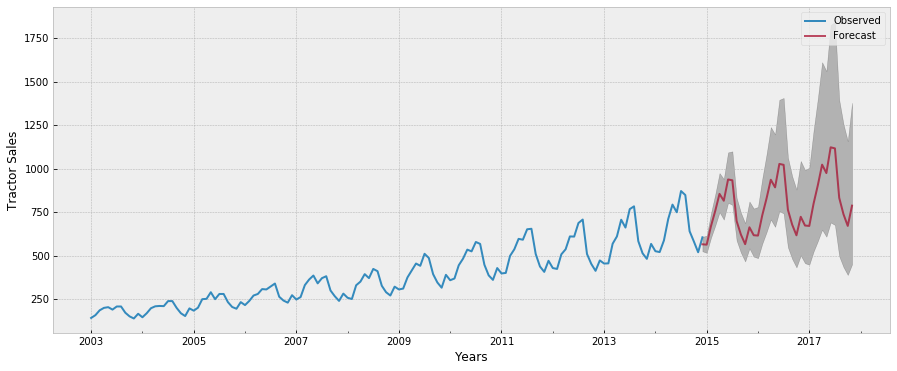

In [222]:
# plot the forecast along with the confidence band
axis = sales_ts.plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

In [93]:
#Diagnostics
    #1. Errors follows normality
    #2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
    #3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)

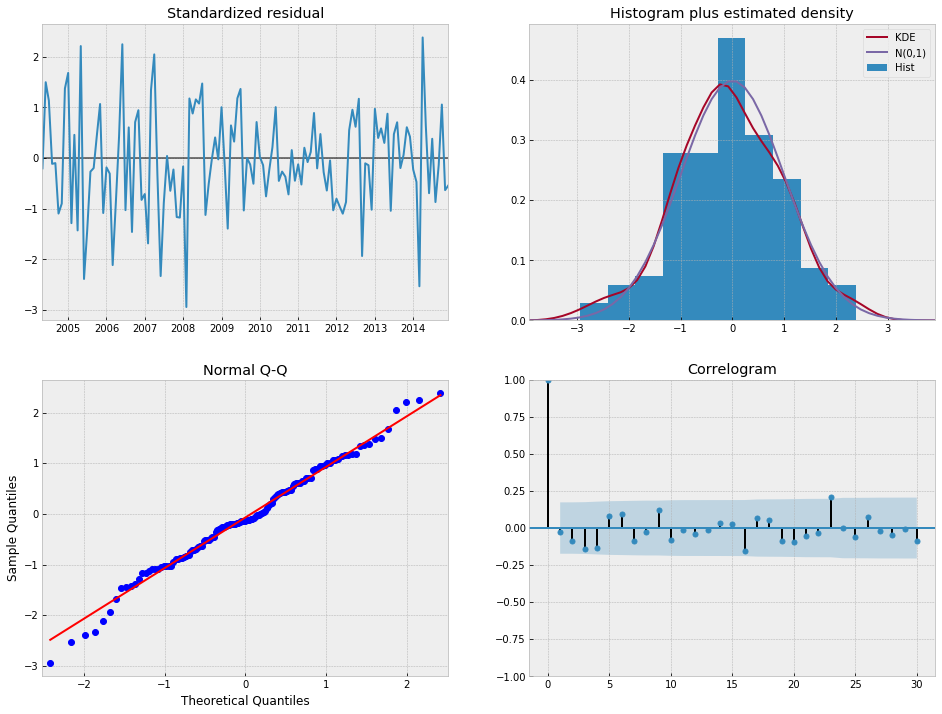

In [223]:
best_results.plot_diagnostics(lags=30, figsize=(16,12))
plt.show()

# Timeseries Forecasting using FBProphet

Released by Facebook in 2017, forecasting tool Prophet is designed for analyzing time-series that display patterns on different time scales such as yearly, weekly and daily. It also has advanced capabilities for modeling the effects of holidays on a time-series and implementing custom changepoints. Therefore, we are using Prophet to get a model up and running.

In [224]:
from fbprophet import Prophet #you need to install fbprophet using pip install

In [225]:
sales_data['ds'] = sales_data.index

In [226]:
sales_data.head()

,Month,Year,Tractor-Sales,ds
2003-01-01,Jan,2003,141,2003-01-01
2003-02-01,Feb,2003,157,2003-02-01
2003-03-01,Mar,2003,185,2003-03-01
2003-04-01,Apr,2003,199,2003-04-01
2003-05-01,May,2003,203,2003-05-01


In [227]:
sales_data = sales_data[['ds', 'Tractor-Sales']].rename(columns={'ds': 'ds', 'Tractor-Sales': 'y'})

In [99]:
Prophet?

In [228]:
sales_model = Prophet(interval_width=0.95)
sales_model.fit(sales_data)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [229]:
sales_forecast = sales_model.make_future_dataframe(periods=36, freq='MS')
sales_forecast = sales_model.predict(sales_forecast)

In [231]:
sales_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2003-01-01,146.451435,11.668850,148.977394,146.451435,146.451435,-64.669824,-64.669824,-64.669824,-64.669824,-64.669824,-64.669824,0.0,0.0,0.0,81.781611
1,2003-02-01,149.545279,23.970553,154.701576,149.545279,149.545279,-61.323140,-61.323140,-61.323140,-61.323140,-61.323140,-61.323140,0.0,0.0,0.0,88.222138
2,2003-03-01,152.339718,88.964732,220.113988,152.339718,152.339718,1.888299,1.888299,1.888299,1.888299,1.888299,1.888299,0.0,0.0,0.0,154.228017
3,2003-04-01,155.433562,117.836376,259.411347,155.433562,155.433562,34.803552,34.803552,34.803552,34.803552,34.803552,34.803552,0.0,0.0,0.0,190.237114
4,2003-05-01,158.427604,166.755966,298.837777,158.427604,158.427604,74.259043,74.259043,74.259043,74.259043,74.259043,74.259043,0.0,0.0,0.0,232.686647
5,2003-06-01,161.521448,140.366596,280.761259,161.521448,161.521448,49.740591,49.740591,49.740591,49.740591,49.740591,49.740591,0.0,0.0,0.0,211.262039
6,2003-07-01,164.515490,194.977372,331.416898,164.515490,164.515490,98.896989,98.896989,98.896989,98.896989,98.896989,98.896989,0.0,0.0,0.0,263.412480
7,2003-08-01,167.609334,196.464366,333.501281,167.609334,167.609334,95.358223,95.358223,95.358223,95.358223,95.358223,95.358223,0.0,0.0,0.0,262.967557
8,2003-09-01,170.703178,88.193586,220.805758,170.703178,170.703178,-16.183420,-16.183420,-16.183420,-16.183420,-16.183420,-16.183420,0.0,0.0,0.0,154.519758
9,2003-10-01,173.697220,38.844434,178.625125,173.697220,173.697220,-63.471739,-63.471739,-63.471739,-63.471739,-63.471739,-63.471739,0.0,0.0,0.0,110.225482


<Figure size 1296x432 with 0 Axes>

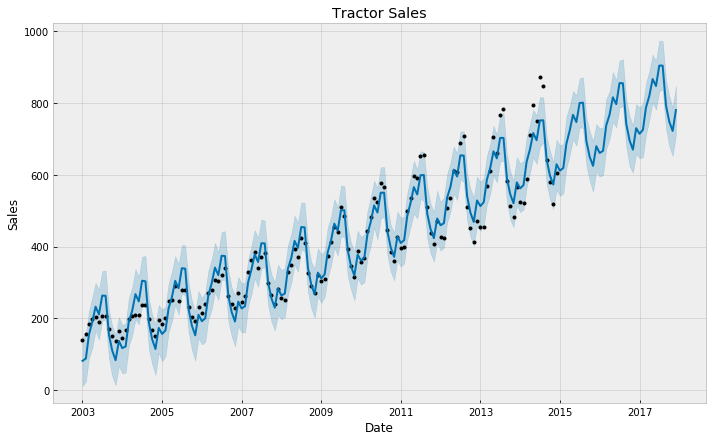

In [232]:
plt.figure(figsize=(18, 6))
sales_model.plot(sales_forecast, xlabel = 'Date', ylabel = 'Sales')
plt.title('Tractor Sales');

#### Trends and Patterns
Now, we can use the Prophet Models to inspect different trends of these two categories in the data.

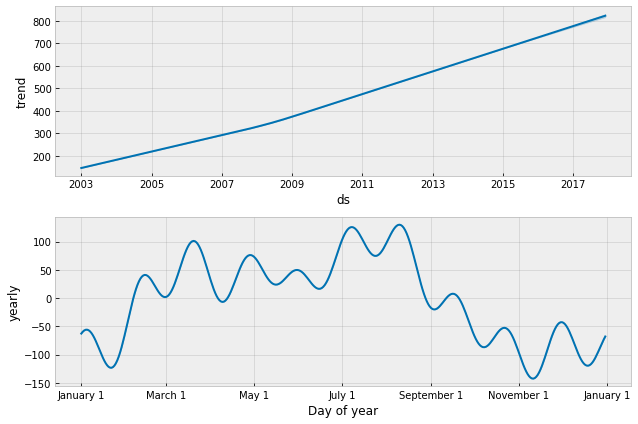

In [233]:
sales_model.plot_components(sales_forecast);

The worst months for tractor sales are November, December and January. The best months for tractor sales are july and august.

### Multivariate Time Series

####  Regression with ARIMA  (ARMAX/SARIMAX)
This analysis will provide some clues towards effectiveness of the marketing program. However, this analysis will not be conclusive for finding shortcomings and enhancements for the program which will require further analysis and creative solutions.

In [104]:
sm.tsa.SARIMAX?

In [234]:
mkt_sales_data = pd.read_csv('sales-and-marketing.csv')

In [235]:
mkt_sales_data.head()

,Time Period,Sales,Marketing Expense
0,Jan-11,397,486.64
1,Feb-11,400,501.80
2,Mar-11,498,437.09
3,Apr-11,536,565.16
4,May-11,596,744.15


In [236]:
# since the complete date was not mentioned, we assume that it was the first of every month
mkt_sales_data.set_index(pd.date_range(start='2011-01-01', freq='MS', periods=len(mkt_sales_data)), inplace=True)
mkt_sales_data.drop(['Time Period'], axis=1, inplace=True)
mkt_sales_data.rename(columns={'Sales':'Tractor-Sales'}, inplace=True)
mkt_sales_data.head(5)

,Tractor-Sales,Marketing Expense
2011-01-01,397,486.64
2011-02-01,400,501.80
2011-03-01,498,437.09
2011-04-01,536,565.16
2011-05-01,596,744.15


To begin with, we plot the following scatter plot of same months marketing expense and tractors sales.

In [237]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(mkt_sales_data['Tractor-Sales'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  1.434334
p-value                         0.997265
#lags Used                     10.000000
Number of Observations Used    37.000000
Critical Value (1%)            -3.620918
Critical Value (5%)            -2.943539
Critical Value (10%)           -2.610400
dtype: float64


In [238]:
mkt_sales_data_diff = mkt_sales_data.diff(periods=1)
mkt_sales_data_diff.dropna(inplace=True)

In [239]:
# Perform Dickey-Fuller test:
from statsmodels.tsa.stattools import adfuller
print('Results of Dickey-Fuller Test:')
dftest = adfuller(mkt_sales_data_diff['Tractor-Sales'])
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -7.015650e+00
p-value                        6.743731e-10
#lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


The correlation for the previous quarter also shows non-existent correlation with sales. Now, let’s build a regression model with ARIMA error (ARIMAX) model for the current and previous months.

In [240]:
mkt_sales_data['Mkt_Exp_Lag_1'] = mkt_sales_data['Marketing Expense'].shift(1)
mkt_sales_data['Mkt_Exp_Lag_2'] = mkt_sales_data['Marketing Expense'].shift(2)
mkt_sales_data['Mkt_Exp_Lag_3'] = mkt_sales_data['Marketing Expense'].shift(3)
mkt_sales_data['Mkt_Exp_Lag_4'] = mkt_sales_data['Marketing Expense'].shift(4)

In [241]:
mkt_sales_data.head()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-01-01,397,486.64,NaN,NaN,NaN,NaN
2011-02-01,400,501.80,486.64,NaN,NaN,NaN
2011-03-01,498,437.09,501.80,486.64,NaN,NaN
2011-04-01,536,565.16,437.09,501.80,486.64,NaN
2011-05-01,596,744.15,565.16,437.09,501.80,486.64


In [242]:
mkt_sales_data.corr()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
Tractor-Sales,1.000000,0.800679,0.592245,0.272188,-0.051202,-0.257012
Marketing Expense,0.800679,1.000000,0.627420,0.387506,0.141520,-0.130755
Mkt_Exp_Lag_1,0.592245,0.627420,1.000000,0.627390,0.387459,0.145967
Mkt_Exp_Lag_2,0.272188,0.387506,0.627390,1.000000,0.627829,0.398619
Mkt_Exp_Lag_3,-0.051202,0.141520,0.387459,0.627829,1.000000,0.634986
Mkt_Exp_Lag_4,-0.257012,-0.130755,0.145967,0.398619,0.634986,1.000000


In [243]:
import sys

def auto_arima(timeseries, regressors=None, p=range(0, 2), d=range(0, 2), q=range(0, 2),
              P=range(0, 2), D=range(0, 1), Q=range(0, 2)):

    # Generate all different combinations of p, d and q triplets
    pdq = list(itertools.product(p, d, q))

    # Generate all different combinations of seasonal p, q and q triplets
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(P, D, Q))]
    
    warnings.filterwarnings("ignore") # specify to ignore warning messages

    best_aic = np.inf
    best_pdq = None
    best_seasonal_pdq = None
    best_results = None
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:

            try:
                temp_model = sm.tsa.statespace.SARIMAX(endog=timeseries,
                                                 exog=regressors,
                                                 order = param,
                                                 seasonal_order = param_seasonal,
                                                 enforce_stationarity=False,
                                                 enforce_invertibility=False)
                temp_results = temp_model.fit()

                print("SARIMAX{}x{}12 - AIC:{}".format(param, param_seasonal, temp_results.aic))
                
                if temp_results.aic < best_aic:
                    best_aic = temp_results.aic
                    best_pdq = param
                    best_seasonal_pdq = param_seasonal
                    best_results = temp_results
                
            except:
                #print("Unexpected error:", sys.exc_info()[0])
                continue
    print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))
    print(best_results.summary().tables[0])
    print(best_results.summary().tables[1])

In [244]:
mkt_sales_data.dropna(inplace=True)
mkt_sales_data.head()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-05-01,596,744.15,565.16,437.09,501.80,486.64
2011-06-01,591,548.74,744.15,565.16,437.09,501.80
2011-07-01,651,650.21,548.74,744.15,565.16,437.09
2011-08-01,654,777.51,650.21,548.74,744.15,565.16
2011-09-01,509,547.11,777.51,650.21,548.74,744.15


In [245]:
mkt_sales_data.corr()

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
Tractor-Sales,1.000000,0.807838,0.585169,0.262011,-0.056909,-0.257012
Marketing Expense,0.807838,1.000000,0.626329,0.380395,0.140597,-0.130755
Mkt_Exp_Lag_1,0.585169,0.626329,1.000000,0.622385,0.380459,0.145967
Mkt_Exp_Lag_2,0.262011,0.380395,0.622385,1.000000,0.625423,0.398619
Mkt_Exp_Lag_3,-0.056909,0.140597,0.380459,0.625423,1.000000,0.634986
Mkt_Exp_Lag_4,-0.257012,-0.130755,0.145967,0.398619,0.634986,1.000000


In [246]:
#ARIMA Model with 2 months Lag Marekting Sales Data Regressor
timeseries = mkt_sales_data["Tractor-Sales"]
regressors = mkt_sales_data[["Marketing Expense", "Mkt_Exp_Lag_1", "Mkt_Exp_Lag_2"]]
best_results = auto_arima(timeseries, regressors, p=range(0, 2), d=range(0, 2), q=range(0, 2),
                         P=range(0, 2), D=range(0, 1), Q=range(0, 2))

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:510.8225704991526
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1323.4743683294887
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:310.0358757787674
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1273.2602618199335
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:486.81113348451817
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2856.0899569704125
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:306.1385210696669
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5464.602594763135
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:488.13235101844816
SARIMAX(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1401.1177638507959
SARIMAX(0, 1, 0)x(1, 0, 0, 12)12 - AIC:298.7640151982337
SARIMAX(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1240.2336176120552
SARIMAX(0, 1, 1)x(0, 0, 0, 12)12 - AIC:474.62197275571225
SARIMAX(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1117.185001087785
SARIMAX(0, 1, 1)x(1, 0, 0, 12)12 - AIC:289.7126796314391
SARIMAX(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1382.4243579625834
SARIMAX(1, 0, 0)x(0, 0, 0, 12)12 - AIC:499.8847851372199
SARIMAX(1, 0, 0)x(0, 0

In [247]:
best_model = sm.tsa.statespace.SARIMAX(timeseries,
                                      exog = regressors,
                                      order=(1, 1, 0),
                                      seasonal_order=(1, 0, 0, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False)
best_results = best_model.fit()

In [248]:
print(best_results.summary())

                                 Statespace Model Results                                 
Dep. Variable:                      Tractor-Sales   No. Observations:                   44
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 12)   Log Likelihood                -135.148
Date:                            Sat, 08 Jun 2019   AIC                            282.295
Time:                                    15:43:33   BIC                            290.702
Sample:                                05-01-2011   HQIC                           284.985
                                     - 12-01-2014                                         
Covariance Type:                              opg                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Marketing Expense     0.0016      0.041      0.040      0.968      -0.080       0.083
Mkt_Exp_Lag_1 

In [249]:
mkt_sales_data

,Tractor-Sales,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2,Mkt_Exp_Lag_3,Mkt_Exp_Lag_4
2011-05-01,596,744.15,565.16,437.09,501.80,486.64
2011-06-01,591,548.74,744.15,565.16,437.09,501.80
2011-07-01,651,650.21,548.74,744.15,565.16,437.09
2011-08-01,654,777.51,650.21,548.74,744.15,565.16
2011-09-01,509,547.11,777.51,650.21,548.74,744.15
2011-10-01,437,382.81,547.11,777.51,650.21,548.74
2011-11-01,406,551.56,382.81,547.11,777.51,650.21
2011-12-01,470,401.69,551.56,382.81,547.11,777.51
2012-01-01,428,370.97,401.69,551.56,382.81,547.11
2012-02-01,423,318.39,370.97,401.69,551.56,382.81


In [250]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('2014-01-01'), full_results=True)

pred_dynamic.predicted_mean

2014-01-01    532.391296
2014-02-01    528.597679
2014-03-01    641.437130
2014-04-01    659.654420
2014-05-01    782.822467
2014-06-01    768.296018
2014-07-01    858.327967
2014-08-01    875.595195
2014-09-01    649.548053
2014-10-01    564.844682
2014-11-01    537.329170
2014-12-01    625.703257
Freq: MS, dtype: float64

In [251]:
forecast = pred_dynamic.predicted_mean
actual = mkt_sales_data['2014-01-01':]['Tractor-Sales']

In [252]:
actual

2014-01-01    525
2014-02-01    520
2014-03-01    587
2014-04-01    710
2014-05-01    793
2014-06-01    749
2014-07-01    871
2014-08-01    848
2014-09-01    640
2014-10-01    581
2014-11-01    519
2014-12-01    605
Freq: MS, Name: Tractor-Sales, dtype: int64

In [253]:
MAPE_last1year = np.mean(np.abs(actual - forecast)/actual)

print('The Mean Absolute percentage error of our forecast for last two years is {}'.format(round(MAPE_last1year, 4)))

The Mean Absolute percentage error of our forecast for last two years is 0.0327


In [254]:
# Compute the mean square error
mse = ((actual - forecast) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 4)))
print('The ROOT Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

The Mean Squared Error of our forecasts is 678.4472
The ROOT Mean Squared Error of our forecasts is 26.04701902329708


In [125]:
#Forecast future

In [255]:
Future_mkt_spend = {
    '2015-01-01' : [600, 559.75, 527.60],
    '2015-02-01' : [550, 600, 559.75],
    '2015-03-01' : [700, 550, 600],
    '2015-04-01' : [590, 700, 550],
    '2015-05-01' : [480, 590, 700],
    '2015-06-01' : [520, 480, 590],
    '2015-07-01' : [800, 520, 480],
    '2015-08-01' : [675, 800, 520],
    '2015-09-01' : [820, 675, 800],
    '2015-10-01' : [710, 820, 675],
    '2015-11-01' : [550, 710, 820],
    '2015-12-01' : [590, 550, 710]
}

In [256]:
Future_mkt_spend = pd.DataFrame(Future_mkt_spend).T

In [257]:
Future_mkt_spend.columns = ['Marketing Expense', 'Mkt_Exp_Lag_1', 'Mkt_Exp_Lag_2']

In [258]:
Future_mkt_spend

,Marketing Expense,Mkt_Exp_Lag_1,Mkt_Exp_Lag_2
2015-01-01,600.0,559.75,527.60
2015-02-01,550.0,600.00,559.75
2015-03-01,700.0,550.00,600.00
2015-04-01,590.0,700.00,550.00
2015-05-01,480.0,590.00,700.00
2015-06-01,520.0,480.00,590.00
2015-07-01,800.0,520.00,480.00
2015-08-01,675.0,800.00,520.00
2015-09-01,820.0,675.00,800.00
2015-10-01,710.0,820.00,675.00


In [259]:
#Forecast for next 12 Months
best_results.forecast(steps=12, exog=Future_mkt_spend)

2015-01-01    562.280028
2015-02-01    559.482882
2015-03-01    628.947677
2015-04-01    775.317137
2015-05-01    863.217371
2015-06-01    824.207622
2015-07-01    978.246627
2015-08-01    956.313071
2015-09-01    705.383960
2015-10-01    635.024933
2015-11-01    553.749841
2015-12-01    649.498407
Freq: MS, dtype: float64

In [260]:
#### Step 8: Forecast sales using the best fit ARIMA model
#The next step is to predict tractor sales for next 6 Months through the above model.

# Get forecast 12 steps (12 Months) ahead in future
n_steps = 12
pred_uc_99 = best_results.get_forecast(steps=12, alpha=0.01, exog=Future_mkt_spend) # alpha=0.01 signifies 99% confidence interval
pred_uc_95 = best_results.get_forecast(steps=12, alpha=0.05, exog=Future_mkt_spend) # alpha=0.05 95% CI

# Get confidence intervals 95% & 99% of the forecasts
pred_ci_99 = pred_uc_99.conf_int()
pred_ci_95 = pred_uc_95.conf_int()

In [261]:
n_steps = 12
idx = pd.date_range(mkt_sales_data.index[-1], periods=n_steps, freq='MS')
fc_95 = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=idx, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

fc_99 = pd.DataFrame(np.column_stack([pred_ci_99]), 
                     index=idx, columns=['lower_ci_99', 'upper_ci_99'])
fc_all = fc_95.combine_first(fc_99)
fc_all = fc_all[['forecast', 'lower_ci_95', 'upper_ci_95', 'lower_ci_99', 'upper_ci_99']] # just reordering columns
fc_all.head()

,forecast,lower_ci_95,upper_ci_95,lower_ci_99,upper_ci_99
2014-12-01,562.280028,519.378936,605.181120,519.378936,605.181120
2015-01-01,559.482882,512.541393,606.424370,512.541393,606.424370
2015-02-01,628.947677,571.961449,685.933906,571.961449,685.933906
2015-03-01,775.317137,713.112295,837.521980,713.112295,837.521980
2015-04-01,863.217371,794.569086,931.865655,794.569086,931.865655


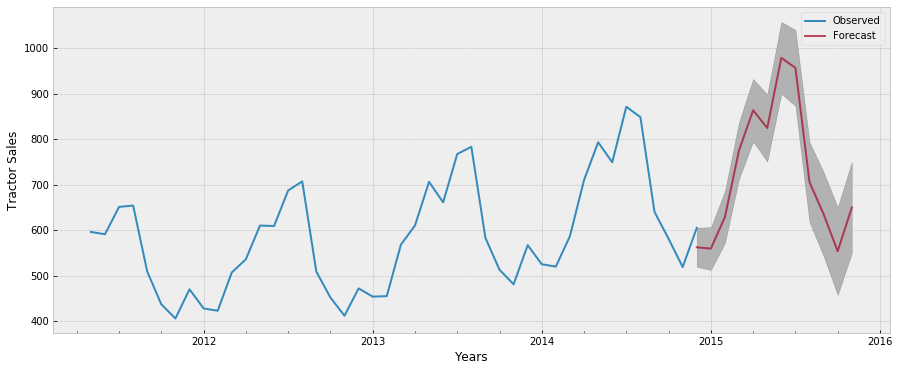

In [262]:
# plot the forecast along with the confidence band
axis = mkt_sales_data['Tractor-Sales'].plot(label='Observed', figsize=(15, 6))
fc_all['forecast'].plot(ax=axis, label='Forecast', alpha=0.7)
#axis.fill_between(fc_all.index, fc_all['lower_ci_95'], fc_all['upper_ci_95'], color='k', alpha=.25)
axis.fill_between(fc_all.index, fc_all['lower_ci_99'], fc_all['upper_ci_99'], color='k', alpha=.25)
axis.set_xlabel('Years')
axis.set_ylabel('Tractor Sales')
plt.legend(loc='best')
plt.show()

In [263]:
#Diagnostics
    #1. Errors follows normality
    #2. Errors should not have auto correlation (ACF, no spikes beyond the limits)
    #3. Errors should not have any spikes (if the spikes are present, that particular time period, model didn't predict propoerly)


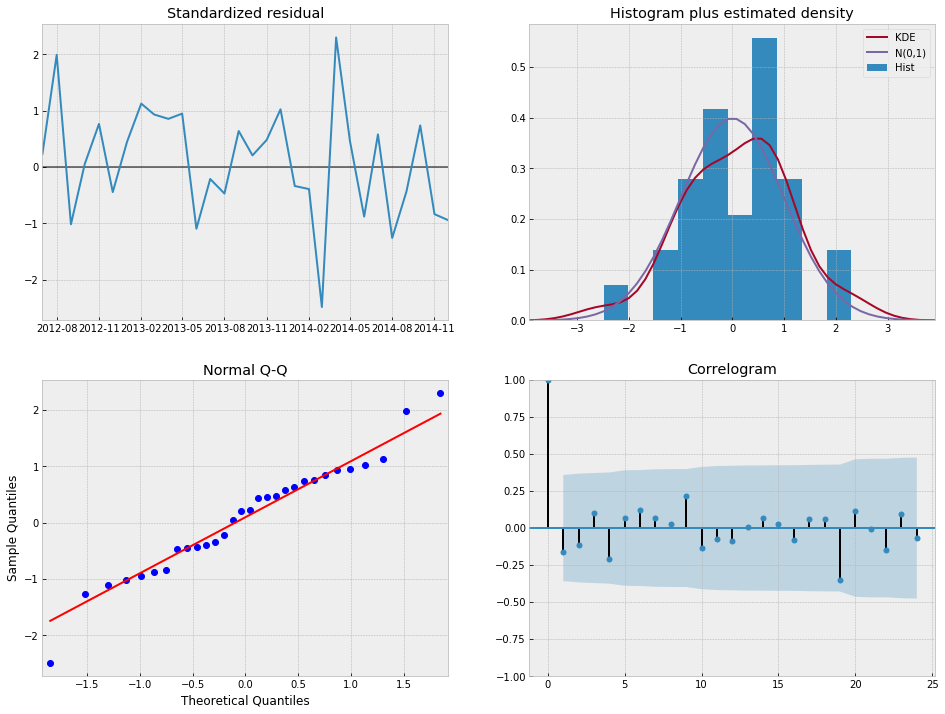

In [264]:
best_results.plot_diagnostics(lags=24, figsize=(16,12))
plt.show()